# SQL in Python

## Table of content

1. [SQL in Python](#SQL-in-Python)
2. [SQL libraries in Python](#SQL-libraries-in-Python)
3. [mysql-connector-python](#mysql-connector-python)
    1. [Connecting to a server](#Connecting-to-a-server)
    2. [Closing the connection](#Closing-the-connection)
    3. [Connecting to a database](#Connecting-to-a-database)
    4. [The cursor object](#The-cursor-object)
       1. [execute and fetchall](#execute-and-fetchall)
       2. [Accessing Data](#Accessing-Data)
       3. [Excursion: turning the result set into a pandas DataFrame](#Excursion:-turning-the-result-set-into-a-pandas-DataFrame)
    5. [Creating Databases and Tables](#Creating-Databases-and-Tables)
    6. [Inserting Data](#Inserting-Data)
       1. [Creating a function for inserting data](#Creating-a-function-for-inserting-data) 
    7. []()
4. [Exercises](#Exercises)
    1. [Exercise 27 - Selections in Python](#Exercise-27---Selections-in-Python)
    2. [Exercise 28 - Creating tables in Python](#Exercise-28---Creating-tables-in-Python)

# SQL libraries in Python

There are many different modules that allow Python to connect to SQL libraries. For each SQL version there is a tailored Python module.

These libraries allow communication with the database and to hand over SQL statement to the server.

# mysql-connector-python

This module allows us to work on a MySQL database (local or remote) and see the changes directly on the server.

import Syntax: 

```
import mysql.connector
```

## Connecting to a server

The first step is always to connect to the database. Since we need the connection later we save it in a variable (a connection object). We use the connection object and its associated methods to work with the database. The three arguments are handed over as strings.

```
connection = mysql.connector.connect(host, user, password)
```
**Example:**

```
connection = mysql.connector.connect(host='localhost', user='root', password='Snf31J,wiiK47iMS!')
```
- host is either the IP adress of the server of `localhost` if local. If there are more than one local server the port has to specified as well (e.g. `localhost:3306`, which is the full name/full path to a server.
- username can be found in the workbench on the little grey field, usually its `root`

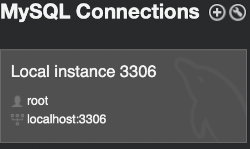

## Closing the connection

After working on the server it is very important to *close the connection*!! (And the  cursor, see below)

```
cursor.close()
connection.close()
```

## Connecting to a database

There are two ways to connect to a database

1. through the connection object:

```
connection = mysql.connector.connect(host='host_IP', database='database_name', user='username', password='password')
```

2. with the cursor (see below)

```
cursor.execute(USE database)
```


In [1]:
#Example which shows the version of the MySQL server

import mysql.connector

connection = mysql.connector.connect(host='localhost',user='root',password='SQLforABI2024')

db_Info = connection.get_server_info()
print("Connected to MySQL Server version", db_Info)

connection.close()

Connected to MySQL Server version 8.3.0


## The cursor object

The cursor is used to 'carry information' between us and the database. It is created with the `cursor` method of the connection object. We also have to close the cursor at the end of the script (but before closing the connection)

```
cursor = connection.cursor

...

cursor.close()
```

The last two lines of a script are therefore always:

```
cursor.close()
connection.close()
```

### execute and fetchall

- We use the object method `execute` to hand over SQL statements to the database.
- *In theory* Two or more SQL statements can be handed over separated by `;` as normal SQL syntax rules apply. ***HOWEVER*** this doesn't work for me!!!
- The object method `fetchall` then unloads the result set, which we can store in a variable and use.
- The result set is returned as a list where every row of the result set is stored in a tuple with one element for each column of the result set
- An empty field (`NULL` in SQL) is filled with a `None` object
- column names are not included in the tuple! To get the column names we need `cursor.column_names`
- It is necessary to unload the cursor with `fetchall` everytime a result set is created! We cannot hand over another `execute` argument if a result set is still stored on the cursor -> produces an error

```
cursor.execute('SQL code')
records = cursor.fetchall()
col_names = cursor.column_names
```


In [2]:
# Example1: SHOW DATABASES

import mysql.connector

connection = mysql.connector.connect(host='localhost',user='root',password='SQLforABI2024')
cursor = connection.cursor()

cursor.execute("SHOW DATABASES")
records = cursor.fetchall()
print(records)

cursor.close()
connection.close()

[('databasecq',), ('Exc20_books',), ('Exc20_uni',), ('greenhouses',), ('information_schema',), ('laboratory',), ('magic',), ('mysql',), ('performance_schema',), ('Python_books',), ('sys',)]


### Accessing Data

Inside `cursor.execute` we can use all SQL commands we learned, e.g.
- `SELECT` including WHERE, IN, LIKE, BETWEEN, HAVING, SUM, AVG etc. etc.

A note on quotation marks: To make sure everything is understood correctly use `""` *around* the SQL statement and `''` *inside* the SQL statement to make sure the command is recognized in its entirety. What is also possible is to use `""" """` to go over several lines

```
# one way
cursor.execute("SELECT * FROM table_name WHERE Name = 'Einstein'")


# this second case requires the ; at the end of the statement
# to separate the final ' from Einstein from the triplet '''
cursor.execut('''SELECT * FROM table_name
WHERE NAME = 'Einstein';''')

# a better way
cursor.execut("""SELECT * FROM table_name
WHERE NAME = 'Einstein' """)
```




In [3]:
#Example 2: SELECT
import mysql.connector

connection = mysql.connector.connect(host='localhost',user='root',password='SQLforABI2024')
cursor = connection.cursor()

cursor.execute('USE greenhouses')
cursor.execute('SELECT * FROM greenhouses')
records = cursor.fetchall()
col_names = cursor.column_names

print(col_names)
print(records)

cursor.close()
connection.close()

('ID', 'Size_m2', 'Address', 'No_Patches', 'Temp_Celsius', 'Humidity_Percent')
[(1, 60, 'Plant Way 1, 10000 Treeville', 12, 25.0, Decimal('45.00')), (2, 120, 'Plant Way 2, 10000 Treeville', 24, 35.0, Decimal('80.00')), (3, 40, 'Flower Lane 123, 10020 Bushwack', 6, 30.0, Decimal('60.00')), (4, 450, 'Bush Road 5, 10010 Flower Village', 180, 33.0, Decimal('72.50'))]


### Excursion: turning the result set into a pandas DataFrame

To turn the tuples into a dataframe that I can work with I first create a dataframe with the column names saved from the cursor obeject. I then iterate over the number of tuples in my records list (= the number of rows in the record set) adding the data into the DataFrame with RowNames being simply Row1:

```
records = cursor.fetchall()
col_names = cursor.column_names

df1 = pd.DataFrame(columns = col_names)
for i in range(len(records)):
    df1.loc["Row"+str(i+1),:] = records[i]
```

or being a bit more fancy and using the primary key (which I know is the first element of the tuple) in the Rowname:

```
for i in range(len(records)):
    df1.loc["Row"+str(records[i][0]),:] = records[i]
```

when it gets complicated in composite keys I can even add more columns, I just have to know the position in the tuple:

```
for i in range(len(records)):
    df1.loc["Row"+str(records[i][0])+str(records[i][1]),:] = records[i]
```

or the whole thing as a function:

```
def prettySQL_result(query):
    cursor.execute(query)
    records = cursor.fetchall()
    col_names =  cursor.column_names
    df = pd.DataFrame(columns = col_names)
    for i in range(len(records)):
        df.loc["Row"+str(i+1),:] = records[i]
    return df
```



In [4]:
import pandas as pd

df1 = pd.DataFrame(columns = col_names)

for i in range(len(records)):
    df1.loc["ID_"+str(records[i][0]),:] = records[i]

print(df1)

     ID Size_m2                            Address No_Patches Temp_Celsius  \
ID_1  1      60       Plant Way 1, 10000 Treeville         12         25.0   
ID_2  2     120       Plant Way 2, 10000 Treeville         24         35.0   
ID_3  3      40    Flower Lane 123, 10020 Bushwack          6         30.0   
ID_4  4     450  Bush Road 5, 10010 Flower Village        180         33.0   

     Humidity_Percent  
ID_1            45.00  
ID_2            80.00  
ID_3            60.00  
ID_4            72.50  


## Creating Databases and Tables

Databases and tables are created exactly as in the workbench with `CREATE DATABASE` and `CREATE TABLE`

- all datatypes and constraints apply
- note that this might differ in other SQL Syntaxes!
- Since the statements get very long it is useful to use triple quotation marks

Syntax:

```
cursor.execut("""CREATE TABLE table_name(
column_name1 datatype constraints,
column_name2 datatype constraints,
further constraints""")
```



## Inserting Data

This can be done either in exactly the same way as in SQL, however we can use loops or write functions to automate the process. The steps are

1. enter data
2. save the data on the server with commit

A simple example:

```
cursor.execute("INSERT INTO table_name (col1, col2, col3) VALUES ('val1',None,3)")
connection.commit()
```
### Creating a function for inserting data

If you don't already have a datafram the best way to insert data is a function. This function should contain one argument for each column to be filled and a different one is needed for each table.

- I still have to add every row one by one, but the typing is easier
- the column names in `query` have to fit the order of the arguments in `record`
- `%s` is a placeholder where the contents of the tuple `record` are placed, i.e. we need as many `%s` as we have columns to input
- `%s` converts the inputs arguments into strings (since `query` is a string) so `cursor.execute` can handle them
- data types remain intact in this process
- if a single column is to be put it is important to have a comma in `record = (arg_col1,)` to actually create a tuple!!

```
def insert_into_table(arg_col1,arg_col2,arg_col3):
    query = "INSERT INTO table_name (col1, col2, col3) VALUES (%s,%s,%s)"
    record = (arg_col1,arg_col2,arg_col3)
    cursor.execute(query,record)
    connection.commit()
```

If I now have three lists with input arguments (list_col1, list_col2, list_col3) I can loop over the function:

```
for list1,list2,list3 in zip(list_col1, list_col2, list_col3):
    insert_into_table(list1,list2,list3)
```

In one of Christophs Example scripts is also an example how to write such a function in a general way to fit different tables of a database or to input data in only a few columns

There is also an example how to directly import data from a pandas dataframe into a database


# Exercises

## Exercise 27 - Selections in Python

You created many different SELECT statements for Exercise 1 up until Exercise 16
- Pick at least eight of them and run them using a Python script with the help of the mysql-connector-python
- Please print out the results for each of them

In [5]:
import mysql.connector
import pandas as pd

def pretty_result(query):
    cursor.execute(query)
    records = cursor.fetchall()
    col_names =  cursor.column_names
    df = pd.DataFrame(columns = col_names)
    for i in range(len(records)):
        df.loc["Row"+str(i+1),:] = records[i]
    return df

connection = mysql.connector.connect(host='localhost',user='root',password='SQLforABI2024')
cursor = connection.cursor()
cursor.execute("USE databasecq")

In [6]:
df1 = pretty_result('''SELECT * FROM proteins 
WHERE Protein_Length > 1000 AND Mass > 100000;''')
print(df1)

      ID                                       Protein_Name Protein_Length  \
Row1   5                           UDP-glucose-glycoprotein           1509   
Row2  10                                 Genome polyprotein           3010   
Row3  13                                         Huntingtin           3142   
Row4  22                               Ryanodine receptor 2           4967   
Row5  39                     LysM domain-containing protein           1188   
Row6  53  NACHT, LRR and PYD domains-containing protein ...           1177   
Row7  84                                Alpha-mannosidase 2           1130   

     Annotation    Mass Organism_ID  
Row1          2  170912          32  
Row2          5  327194          35  
Row3          5  347603           1  
Row4          5  564567           1  
Row5          1  133730           7  
Row6          5  134163           3  
Row7          5  131066          29  


In [7]:
df2 = pretty_result("SELECT * FROM proteins WHERE NOT Organism_ID = 4;")
print(df2)

       ID                                       Protein_Name Protein_Length  \
Row1    1                                         Calmodulin            169   
Row2    2                            Uncharacterized Protein            608   
Row3    3                                      cDNA FLJ61389            824   
Row4    4                    Outer membrane lipoprotein slyB            155   
Row5    5                           UDP-glucose-glycoprotein           1509   
...    ..                                                ...            ...   
Row81  86                     Casein kinase II subunit alpha            353   
Row82  87                         Transcription factor SOX-6            827   
Row83  88  UDP-N-acetylmuramoyl-L-alanyl-D-glutamate--2,6...            485   
Row84  89                                       CTP synthase            546   
Row85  90                                        Tetanolysin            527   

      Annotation    Mass Organism_ID  
Row1        

In [8]:
df3 = pretty_result("SELECT * FROM structures WHERE Method_ID = 1 OR Method_ID = 2 OR Method_ID = 3;")
print(df3)

      Identifier Source_ID Protein_ID Method_ID Start_AS End_As Total_Length
Row1        5SY1         1          1         1        1    149          149
Row2        6EZ8         1         13         1        1   3142         3142
Row3        7DRT         1         14         1        1    352          352
Row4        7DXK         1         13         1       18   3142         3125
Row5        7O0Y         1          9         1        1    436          436
Row6        7T10         1         11         1        1    369          369
Row7        7UA5         1         22         1        1   4967         4967
Row8        7VUG         1          8         1       29    213          184
Row9        1A1Q         1         10         2     1027   1215          188
Row10       1A2B         1         46         2        1    181          181
Row11       1AAP         1          6         2      287    344           57
Row12       1AOG         1         43         2        3    487          485

In [9]:
df4 = pretty_result("SELECT * FROM structures WHERE Source_ID = 2 ORDER BY Identifier;")
print(df4)

             Identifier Source_ID Protein_ID Method_ID Start_AS End_As  \
Row1   AF-A0A023J5X7-F1         2         23         4        1    459   
Row2   AF-A0A023J5Y8-F1         2         24         4        1    381   
Row3   AF-A0A023PRC9-F1         2         39         4        1   1188   
Row4   AF-A0A060N0V5-F1         2         31         4        1    275   
Row5   AF-A0A0F4EQE4-F1         2         65         4        1    426   
...                 ...       ...        ...       ...      ...    ...   
Row82      AF-Q9K3C5-F1         2         17         4        1    474   
Row83      AF-Q9KL83-F1         2         38         4        1    796   
Row84      AF-Q9UWX9-F1         2         33         4        1    335   
Row85      AF-Q9Y251-F1         2         18         4        1    543   
Row86      AF-V9I190-F1         2         30         4        1    963   

      Total_Length  
Row1           459  
Row2           381  
Row3          1188  
Row4           275  
Row5  

In [10]:
df5 = pretty_result("SELECT * FROM modification_data ORDER BY Hydrogenbond_donors, Hydrogenbond_acceptors;")
print(df5)

       ID Molecular_Weight   IUPAC_Condensed  \
Row1   16           189.28     H-Lys(Me3)-OH   
Row2   20            117.1         Ac-Gly-OH   
Row3   15           145.16  H-DL-Nva(For)-OH   
Row4   17           174.24     H-Lys(Me2)-OH   
Row5   25           191.25         Ac-Met-OH   
Row6    1           188.22      H-Lys(Ac)-OH   
Row7   10           147.13         Ac-Ser-OH   
Row8   13           202.25     H-Arg(Me2)-OH   
Row9   22           160.21      H-Lys(Me)-OH   
Row10  35           161.16         Ac-Thr-OH   
Row11  33           175.14         Ac-Asp-OH   
Row12   7           261.25    H-Tyr(SO3H)-OH   
Row13  14           175.19          H-Cit-OH   
Row14   2            199.1   H-Thr(PO3H2)-OH   
Row15   6           185.07   H-Ser(PO3H2)-OH   
Row16   8           261.17  H-TYR(PO3H2)-OH)   
Row17  34           235.13    (HO)2PO-His-OH   
Row18  27           375.31              None   

                                              IUPAC_Name  CAS_Number  \
Row1           

In [11]:
df6 = pretty_result("SELECT * FROM structures WHERE Source_ID = 2 ORDER BY Identifier;")
print(df6)

             Identifier Source_ID Protein_ID Method_ID Start_AS End_As  \
Row1   AF-A0A023J5X7-F1         2         23         4        1    459   
Row2   AF-A0A023J5Y8-F1         2         24         4        1    381   
Row3   AF-A0A023PRC9-F1         2         39         4        1   1188   
Row4   AF-A0A060N0V5-F1         2         31         4        1    275   
Row5   AF-A0A0F4EQE4-F1         2         65         4        1    426   
...                 ...       ...        ...       ...      ...    ...   
Row82      AF-Q9K3C5-F1         2         17         4        1    474   
Row83      AF-Q9KL83-F1         2         38         4        1    796   
Row84      AF-Q9UWX9-F1         2         33         4        1    335   
Row85      AF-Q9Y251-F1         2         18         4        1    543   
Row86      AF-V9I190-F1         2         30         4        1    963   

      Total_Length  
Row1           459  
Row2           381  
Row3          1188  
Row4           275  
Row5  

In [12]:
df7 = pretty_result("SELECT * FROM atom_information WHERE SMILES IS NOT NULL AND Charge > 0;")
print(df7)

     Hetero_ID       Atom_Name Charge     Mass CHEBI_ID  \
Row1         1     calcium(2+)     +2   40.078    29108   
Row2         6  magnesiums(2+)     +2   24.305    18420   
Row3         7        zinc(2+)     +2    65.39    29105   
Row4        12      sodium(1+)     +1  22.9898    29101   
Row5        14   manganese(2+)     +2   54.938    29035   
Row6        25           NADP+     +1  744.413    18009   

                                                 SMILES  
Row1                                             [CA++]  
Row2                                             [Mg++]  
Row3                                             [Zn++]  
Row4                                              [Na+]  
Row5                                             [Mn++]  
Row6  NC(=O)c1ccc[n+](c1)[C@@H]1O[C@H](COP(O)(=O)OP(...  


In [13]:
df8 = pretty_result("SELECT * FROM cellular_location WHERE Location_Description IS NOT NULL AND Gene_Ontology > 10000 LIMIT 3;")
print(df8)

      ID        Short                               Location_Description  \
Row1   5         Axon  The axon is the long process of a neuron that ...   
Row2   6    Periplasm  The periplasm is the space between the inner a...   
Row3  33  Cell septum  A structure composed of peptidoglycan and ofte...   

     Gene_Ontology Uniprot_ID  
Row1         30424    SL-0279  
Row2         42597    SL-0200  
Row3         30428    SL-0455  


In [14]:
cursor.close()
connection.close()

## Exercise 28 - Creating tables in Python

Write a Python program that creates the Tables below, don’t forget to add all necessary constraints, especially the Primary and Foreign Keys. Just like with Exercise 20 the column names are in brackets after the Table name:

- books (ID, Book_Title, ISBN, Publication_Date, Publisher_ID, Page_Count, Price, Original_Language)
- publishers (ID, Publisher_Name, City, Address, EMail, Telephone)
- authors (ID, Last_Name, Given_Name, Title, Birthdate, Birthplace)
- wrote (Book_ID, Author_ID)

In [15]:
import mysql.connector
import pandas as pd

def pretty_result(query):
    cursor.execute(query)
    records = cursor.fetchall()
    col_names =  cursor.column_names
    df = pd.DataFrame(columns = col_names)
    for i in range(len(records)):
        df.loc["Row"+str(i+1),:] = records[i]
    return df

connection = mysql.connector.connect(host='localhost',user='root',password='SQLforABI2024')
cursor = connection.cursor()

cursor.execute("DROP DATABASE IF EXISTS Python_books")
cursor.execute("CREATE DATABASE Python_books")
cursor.execute("USE Python_books")

cursor.execute("""
CREATE TABLE publishers(
ID int PRIMARY KEY AUTO_INCREMENT, 
Publisher_Name varchar(255) NOT NULL, 
City varchar(255), 
Address varchar(255), 
EMail varchar(255), 
Telephone varchar (25),
CONSTRAINT Email_Check_Publ CHECK (EMail LIKE '%_@%_.%_' OR EMail IS NULL));""")

cursor.execute("""
CREATE TABLE authors(
ID int PRIMARY KEY AUTO_INCREMENT, 
Last_Name varchar(255) NOT NULL, 
Given_Name varchar(255), 
Title varchar(255), 
Birthdate date, 
Birthplace varchar(255));
""")

cursor.execute("""CREATE TABLE books(
ID int PRIMARY KEY AUTO_INCREMENT,
Book_Title varchar(255), 
ISBN varchar(17), 
Publication_Date date, 
Publisher_ID int, 
Page_Count int, 
Price float, 
Original_Language varchar(50) DEFAULT 'English',
FOREIGN KEY (Publisher_ID) REFERENCES publishers(ID),
CONSTRAINT Price_Check CHECK (Price > 0)
)""")

cursor.execute("""CREATE TABLE wrote(
Book_ID int, 
Author_ID int,
FOREIGN KEY (Book_ID) REFERENCES books(ID),
FOREIGN KEY (Author_ID) REFERENCES authors(ID)
)""")



In [16]:
books = pretty_result("SELECT * FROM books")
publishers = pretty_result("SELECT * FROM publishers")
authors = pretty_result("SELECT * FROM authors")
wrote = pretty_result("SELECT * FROM wrote")

In [17]:
print(books)
print()
print(publishers)
print()
print(authors)
print()
print(wrote)

Empty DataFrame
Columns: [ID, Book_Title, ISBN, Publication_Date, Publisher_ID, Page_Count, Price, Original_Language]
Index: []

Empty DataFrame
Columns: [ID, Publisher_Name, City, Address, EMail, Telephone]
Index: []

Empty DataFrame
Columns: [ID, Last_Name, Given_Name, Title, Birthdate, Birthplace]
Index: []

Empty DataFrame
Columns: [Book_ID, Author_ID]
Index: []


In [18]:
cursor.close()
connection.close()

## Exercise 29 - Filling tables in Python

Write a Python script that allows you to fill the tables you created in Exercise 28

- Create one function for each of your tables
- Call each function at least twice to fill the tables with at least two rows of data

In [19]:
import mysql.connector
import pandas as pd

def pretty_result(query):
    cursor.execute(query)
    records = cursor.fetchall()
    col_names =  cursor.column_names
    df = pd.DataFrame(columns = col_names)
    for i in range(len(records)):
        df.loc["Row"+str(i+1),:] = records[i]
    return df

def insert_publishers(Publisher_Name_arg, City_arg, Address_arg, EMail_arg, Telephone_arg):
    query = "INSERT INTO publishers (Publisher_Name, City, Address, EMail, Telephone) VALUES (%s,%s,%s,%s,%s)"
    record = (Publisher_Name_arg, City_arg, Address_arg, EMail_arg, Telephone_arg)
    cursor.execute(query,record)
    connection.commit()

def insert_books(Book_Title_arg, ISBN_arg, Publication_Date_arg, Publisher_ID_arg, Page_Count_arg, Price_arg):
    query = "INSERT INTO books (Book_Title, ISBN, Publication_Date, Publisher_ID, Page_Count, Price) VALUES (%s,%s,%s,%s,%s,%s)"
    record = (Book_Title_arg, ISBN_arg, Publication_Date_arg, Publisher_ID_arg, Page_Count_arg, Price_arg)
    cursor.execute(query,record)
    connection.commit()

def insert_authors( Last_Name_arg, Given_Name_arg, Title_arg, Birthdate_arg, Birthplace_arg):
    query = "INSERT INTO authors ( Last_Name, Given_Name, Title, Birthdate, Birthplace) VALUES (%s,%s,%s,%s,%s)"
    record = (Last_Name_arg, Given_Name_arg, Title_arg, Birthdate_arg, Birthplace_arg)
    cursor.execute(query,record)
    connection.commit()

def insert_wrote(Book_ID_arg, Author_ID_arg):
    query = "INSERT INTO wrote (Book_ID, Author_ID) VALUES (%s,%s)"
    record = (Book_ID_arg, Author_ID_arg)
    cursor.execute(query,record)
    connection.commit()

connection = mysql.connector.connect(host='localhost',user='root',password='SQLforABI2024')
cursor = connection.cursor()
cursor.execute("USE Python_books")



In [20]:
insert_publishers("Bloomsbury", "London", "Hell1", "Pub@bloom.com", "0015574")
insert_publishers("Allen & Unwin", "Crows Nest", "Hell2", "Pub@Allen.com", "0987")

In [21]:
insert_authors("Rowling", "JKK", None, "1965-07-31", "Yate")
insert_authors("Tokien", "JRR", "Prof. Dr.", "1892-01-03", "Bloemfontein")

In [22]:
title = ["Harry Potter and The Sorcerer's Stone","Harry Potter and the Chamber of Secrets","Harry Potter and the Prisoner of Azkaban","Harry Potter and the Goblet of Fire","The Fellowship of the Ring","The two towers","The returns of the King"]
isbn = ["978-0-7475-3269-9","0-7475-3849-2","0-7475-4215-5","0-7475-4624-X","0-madeup-123451","0-madeup-123452","0-madeup-123453"]
date = ['1997-06-26','1998-07-02','1999-07-08','2000-07-08','1954-07-29','1954-11-11','1955-10-20']
pubid = [1,1,1,1,2,2,2]
page = [223,251,317,636,423,352,416]
price = [10,11,12,13,14,15,16]


for t,i,d,pu,pa,pr in zip(title,isbn,date,pubid,page,price):
    insert_books(t,i,d,pu,pa,pr)


In [23]:
bookid = list(range(1,8))
authorID = [1,1,1,1,2,2,2]

for b, a in zip(bookid,authorID):
    insert_wrote(b,a)

In [24]:
books = pretty_result("SELECT * FROM books")
publishers = pretty_result("SELECT * FROM publishers")
authors = pretty_result("SELECT * FROM authors")
wrote = pretty_result("SELECT * FROM wrote")

print(books)
print()
print(publishers)
print()
print(authors)
print()
print(wrote)

     ID                                Book_Title               ISBN  \
Row1  1     Harry Potter and The Sorcerer's Stone  978-0-7475-3269-9   
Row2  2   Harry Potter and the Chamber of Secrets      0-7475-3849-2   
Row3  3  Harry Potter and the Prisoner of Azkaban      0-7475-4215-5   
Row4  4       Harry Potter and the Goblet of Fire      0-7475-4624-X   
Row5  5                The Fellowship of the Ring    0-madeup-123451   
Row6  6                            The two towers    0-madeup-123452   
Row7  7                   The returns of the King    0-madeup-123453   

     Publication_Date Publisher_ID Page_Count Price Original_Language  
Row1       1997-06-26            1        223  10.0           English  
Row2       1998-07-02            1        251  11.0           English  
Row3       1999-07-08            1        317  12.0           English  
Row4       2000-07-08            1        636  13.0           English  
Row5       1954-07-29            2        423  14.0           E

In [25]:
cursor.close()
connection.close()